In [2]:
import pandas as pd
import numpy as np



data = pd.read_csv(r'F:\data ANALYSIS FILES\mental_health_dataset.csv')
print(data.head(5))

   age      gender employment_status work_environment mental_health_history  \
0   56        Male          Employed          On-site                   Yes   
1   46      Female           Student          On-site                    No   
2   32      Female          Employed          On-site                   Yes   
3   60  Non-binary     Self-employed          On-site                    No   
4   25      Female     Self-employed          On-site                   Yes   

  seeks_treatment  stress_level  sleep_hours  physical_activity_days  \
0             Yes             6          6.2                       3   
1             Yes            10          9.0                       4   
2              No             7          7.7                       2   
3              No             4          4.5                       4   
4             Yes             3          5.4                       0   

   depression_score  anxiety_score  social_support_score  productivity_score  \
0           

In [3]:
print("🔹 Missing values in each column:")
print(data.isnull().sum())

# 📌 2. Check for duplicates
duplicates = data.duplicated().sum()
print(f"\n🔹 Number of duplicate rows: {duplicates}")

# If duplicates exist, you can drop them:
# data = data.drop_duplicates()

# 📌 3. Basic statistics for numeric columns
print("\n🔹 Descriptive Statistics:")
print(data.describe())

# 📌 4. Data types and non-null counts
print("\n🔹 Data Info:")
print(data.info())

# 📌 5. Check unique values for categorical columns
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n🔸 {col} unique values: {data[col].unique()}")

🔹 Missing values in each column:
age                       0
gender                    0
employment_status         0
work_environment          0
mental_health_history     0
seeks_treatment           0
stress_level              0
sleep_hours               0
physical_activity_days    0
depression_score          0
anxiety_score             0
social_support_score      0
productivity_score        0
mental_health_risk        0
dtype: int64

🔹 Number of duplicate rows: 0

🔹 Descriptive Statistics:
                age  stress_level   sleep_hours  physical_activity_days  \
count  10000.000000  10000.000000  10000.000000            10000.000000   
mean      41.557600      5.572000      6.473000                3.505700   
std       13.749581      2.887741      1.473944                2.282737   
min       18.000000      1.000000      3.000000                0.000000   
25%       30.000000      3.000000      5.500000                2.000000   
50%       41.500000      6.000000      6.500000       

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


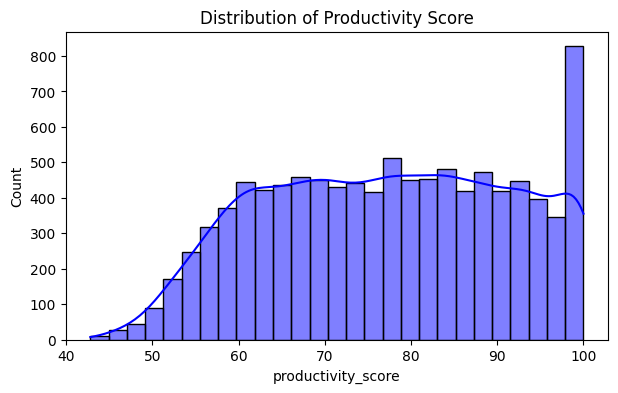

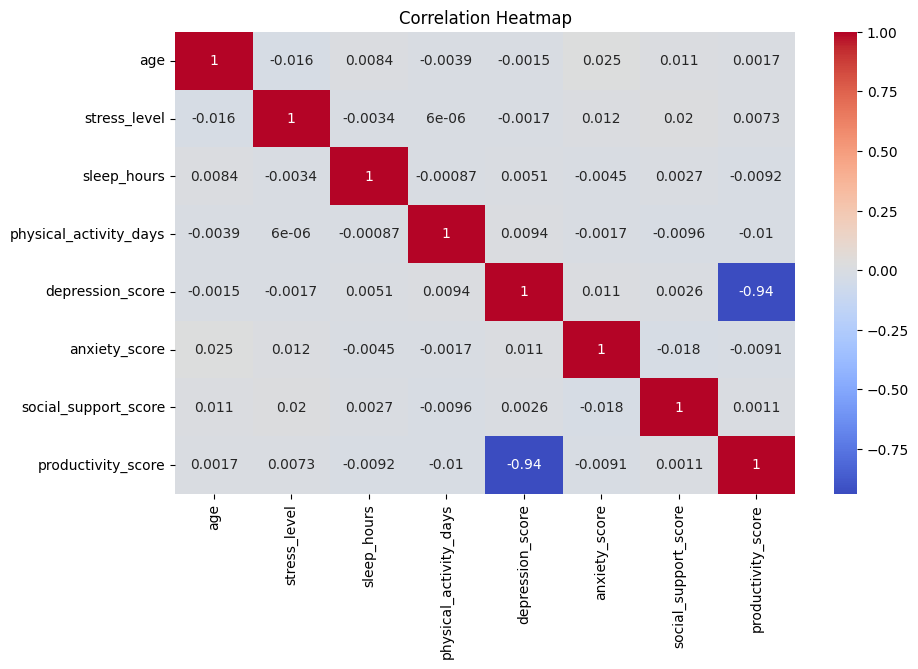

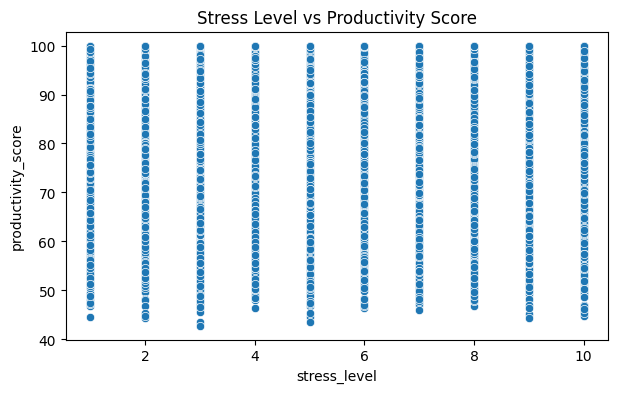

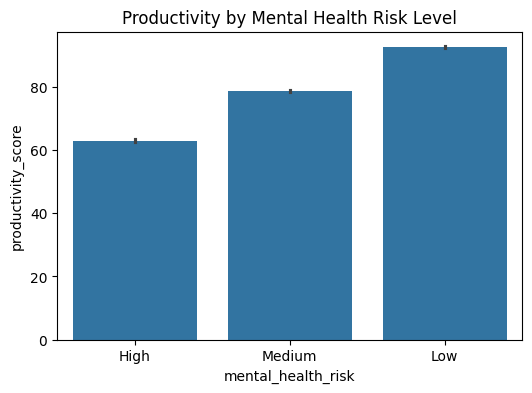

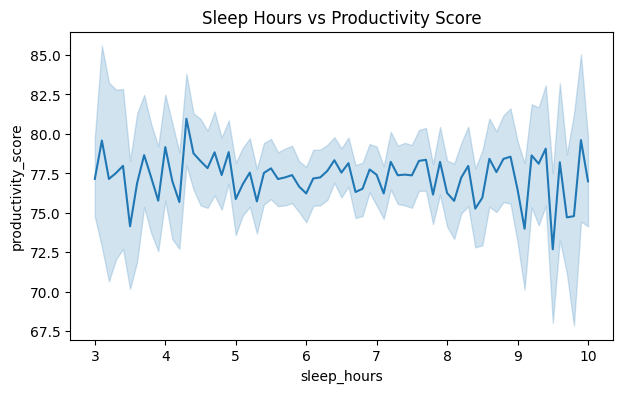

In [7]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 1. Distribution of target variable
plt.figure(figsize=(7,4))
sns.histplot(data['productivity_score'], kde=True, color='blue')
plt.title("Distribution of Productivity Score")
plt.show()

# 📌 2. Correlation heatmap for numeric variables
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 📌 3. Relationship between stress level and productivity
plt.figure(figsize=(7,4))
sns.scatterplot(x='stress_level', y='productivity_score', data=data)
plt.title("Stress Level vs Productivity Score")
plt.show()

# 📌 4. Average productivity by mental health risk
plt.figure(figsize=(6,4))
sns.barplot(x='mental_health_risk', y='productivity_score', data=data)
plt.title("Productivity by Mental Health Risk Level")
plt.show()

# 📌 5. Sleep vs Productivity
plt.figure(figsize=(7,4))
sns.lineplot(x='sleep_hours', y='productivity_score', data=data)
plt.title("Sleep Hours vs Productivity Score")
plt.show()

In [6]:
!pip install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
df = data.copy()

# Encode categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# 🔹 Set new target
target = 'depression_score'
X = df.drop(columns=[target])
y = df[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")

Mean Squared Error: 9.30
R² Score: 0.883


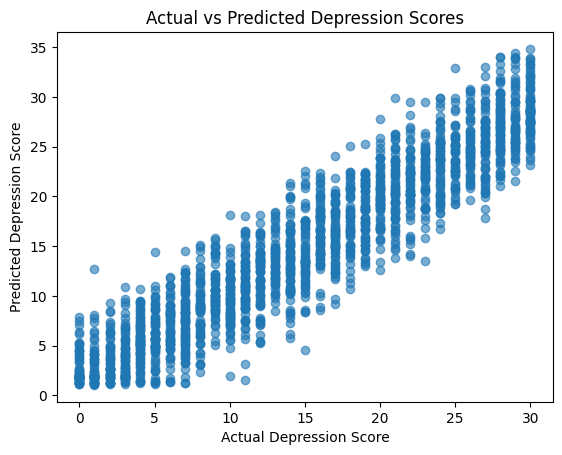

In [9]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Depression Score")
plt.ylabel("Predicted Depression Score")
plt.title("Actual vs Predicted Depression Scores")
plt.show()